# Weather Correlation

Nous allons étudier ici les corrélations entre les différents facteurs météo les jours précédents et le facteur de charge éoliens

In [4]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [5]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [6]:
#On récupère toutes les données nécessaire
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022,data_type="wind")
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

#print(data_hToulouse_weather.head())
print(data_dToulouse_weather.head())

Toutes les données sont différentes
Toutes les données sont différentes
                 t2m  prectotland  precsnoland    snomas      rhoa      swgdn  \
time                                                                            
2000-01-01  6.737042     0.042500     0.000000  0.003958  1.242750  38.081375   
2000-01-02  5.965833     0.003792     0.000083  0.002375  1.245000  51.991000   
2000-01-03  5.200500     0.000000     0.000000  0.001458  1.245375  88.566000   
2000-01-04  6.232792     0.002417     0.000000  0.000500  1.241250  76.269708   
2000-01-05  6.539917     0.001000     0.000000  0.000000  1.229042  58.826917   

                 swtdn    cldtot  
time                              
2000-01-01  133.232833  0.776667  
2000-01-02  133.868292  0.751958  
2000-01-03  134.533792  0.190292  
2000-01-04  135.276458  0.722792  
2000-01-05  136.074958  0.919750  


month  day
12     26     0.283665
       27     0.279244
       28     0.293127
       29     0.241680
       30     0.250356
       31     0.219791
1      1      0.247641
       2      0.296374
       3      0.242205
       4      0.246486
       5      0.234464
       6      0.252540
       7      0.231088
       8      0.233096
       9      0.207310
       10     0.231466
       11     0.242706
       12     0.228578
       13     0.263130
       14     0.271376
Name: electricity, dtype: float64
[0.23323865 0.23239784 0.23391071 0.23966611 0.24677865 0.25850069
 0.26240919 0.26298436 0.26489161 0.26139673 0.26214106 0.26235507
 0.26346595]


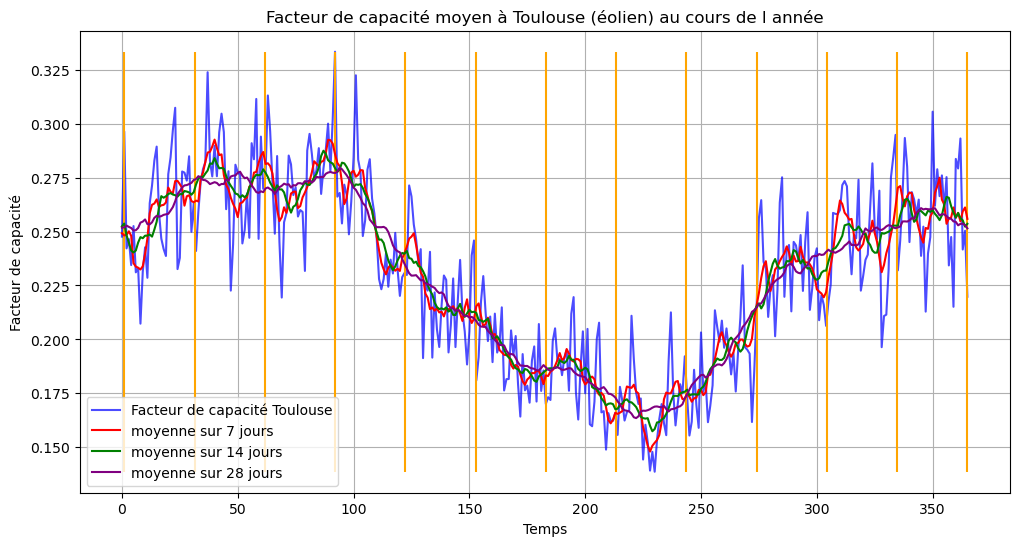

In [10]:
# On commence par regrouper les données par année
data_hour_copy=data_hToulouse_wind.copy()
data_hour_copy['day']=data_hour_copy['time'].dt.day
data_hour_copy['month']=data_hour_copy['time'].dt.month

data_year_wind_tendance = data_hour_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

#print(type(data_year_wind_tendance.index))



# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Facteur de capacité moyen à Toulouse (éolien) au cours de l année')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

time_tick  = np.linspace(1, 365, 13)
plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")

print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

#On ajoute une "moyenne" en lissant
#On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année

plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=f"moyenne sur 7 jours", color = "red")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=f"moyenne sur 14 jours", color = "green")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=f"moyenne sur 28 jours", color = "purple")
plt.legend()

saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]

plt.show()

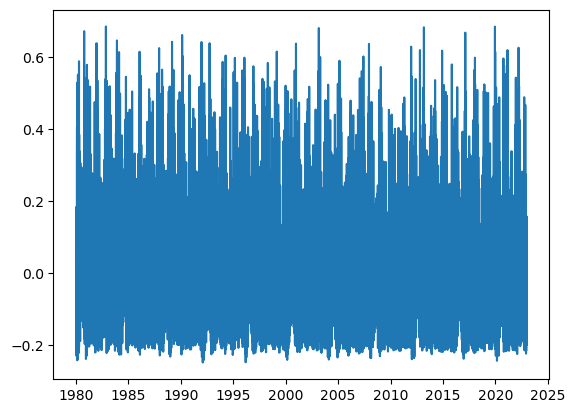

In [12]:
#Mise en forme des données

#Etant donné qu'on a pas soustrait la tendance pour calculer la saisonnalité jusqu'à maintenant, car on prend une tendance constante, je vais juste retirer la saisonnalité.


#On initialise les données
data_day_season=data_dToulouse_wind.copy()
bissextile=4

for i in range(43): #On parcourt nos 43 années de données
    
    if bissextile == 4 : #Si année bissextile
        tend=saison28
        bissextile=0
    else:
        tend=saison28[~59]
        
    #print(1980+i,int(0.75+i*365.25),int(0.75+(i+1)*365.25))
    data_day_season['electricity'].iloc[int(0.75+i*365.25):int(0.75+(i+1)*365.25)]=data_day_season['electricity'].iloc[int(0.75+i*365.25):int(0.75+(i+1)*365.25)]-tend
    
    bissextile += 1

    
plt.plot(data_day_season['electricity'])

In [15]:
df_merged = pd.merge(data_day_season, data_dToulouse_weather, left_index=True, right_index=True)

correlation_matrix = df_merged.corr()
print(correlation_matrix['electricity'])

electricity    1.000000
wind_speed     0.983045
t2m           -0.181958
prectotland    0.291320
precsnoland    0.095287
snomas         0.063451
rhoa           0.133896
swgdn         -0.232238
swtdn         -0.125191
cldtot         0.230102
Name: electricity, dtype: float64


In [22]:
print(df_merged.head())

#On construit un dataframe avec les données décalés d'une journée
df_oneday = df_merged.shift(1)
#print(df_oneday.head())

df_merged_oneday = pd.merge(df_merged, df_oneday, left_index=True, right_index=True)

print(df_merged_oneday.head())



            electricity  wind_speed       t2m  prectotland  precsnoland  \
time                                                                      
2000-01-01    -0.184593    3.991417  6.737042     0.042500     0.000000   
2000-01-02    -0.211278    3.564625  5.965833     0.003792     0.000083   
2000-01-03    -0.099264    5.238458  5.200500     0.000000     0.000000   
2000-01-04    -0.219567    3.373417  6.232792     0.002417     0.000000   
2000-01-05    -0.126986    4.738583  6.539917     0.001000     0.000000   

              snomas      rhoa      swgdn       swtdn    cldtot  
time                                                             
2000-01-01  0.003958  1.242750  38.081375  133.232833  0.776667  
2000-01-02  0.002375  1.245000  51.991000  133.868292  0.751958  
2000-01-03  0.001458  1.245375  88.566000  134.533792  0.190292  
2000-01-04  0.000500  1.241250  76.269708  135.276458  0.722792  
2000-01-05  0.000000  1.229042  58.826917  136.074958  0.919750  
            

In [26]:
correlation_matrix2 = df_merged_oneday.corr()
print(correlation_matrix2['electricity_x'])

electricity_x    1.000000
wind_speed_x     0.983045
t2m_x           -0.181958
prectotland_x    0.291320
precsnoland_x    0.095287
snomas_x         0.063451
rhoa_x           0.133896
swgdn_x         -0.232238
swtdn_x         -0.125191
cldtot_x         0.230102
electricity_y    0.449796
wind_speed_y     0.429572
t2m_y           -0.159548
prectotland_y    0.206321
precsnoland_y    0.082149
snomas_y         0.047719
rhoa_y           0.099542
swgdn_y         -0.189435
swtdn_y         -0.127617
cldtot_y         0.208275
Name: electricity_x, dtype: float64
